# 🧠 Diagnóstico Preditivo de Câncer de Mama

Fase 1 – Pós-Graduação IA para Devs (FIAP)  
Autor: Antonio Augusto Correa Gondim Neto  
RM: 367452 
Turma: 7IADT   
Grupo: 33  

## 🧭 Introdução e Objetivos

O câncer de mama é uma das principais causas de mortalidade entre mulheres em todo o mundo. 
O diagnóstico precoce é essencial para aumentar as chances de tratamento bem-sucedido.

Este notebook tem como objetivo construir e avaliar modelos de aprendizado de máquina capazes de prever o diagnóstico de câncer de mama — **benigno (B)** ou **maligno (M)** — com base em medidas obtidas de imagens de núcleos celulares.

O dataset utilizado é o **Breast Cancer Wisconsin (Diagnostic)**, disponível no Kaggle: [https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

O foco é compreender as relações entre as variáveis, aplicar técnicas de pré-processamento, e comparar modelos de classificação para selecionar aquele com melhor equilíbrio entre desempenho e interpretabilidade.


## 📥 Carregamento e Inspeção Inicial dos Dados

Nesta etapa, o objetivo é **importar o conjunto de dados** e realizar uma **primeira inspeção estrutural**, verificando se o arquivo foi carregado corretamente e se o conteúdo está em conformidade com o esperado para análise.

As ações executadas aqui são fundamentais para **entender a composição do dataset**, **detectar possíveis problemas iniciais** e **definir as próximas etapas de pré-processamento**.

### 🔹 Etapas previstas:

1. **Carregamento do dataset**  
   Importamos o arquivo CSV contendo as amostras de tumores mamários e suas características numéricas, usando a biblioteca `pandas`.

2. **Visualização da estrutura geral**  
   Utilizamos os métodos `info()` e `head()` para inspecionar:
   - O número de observações (linhas);
   - As variáveis disponíveis (colunas);
   - Tipos de dados e presença de valores nulos.

3. **Identificação de colunas irrelevantes**  
   Buscamos colunas que não contribuem para a análise, como identificadores (`id`) ou colunas vazias (`Unnamed: 32`), que devem ser removidas antes de qualquer modelagem.

4. **Compreensão inicial dos dados**  
   Essa etapa fornece o primeiro entendimento sobre a natureza do conjunto, orientando a limpeza, a transformação e a análise exploratória que virão em seguida.

> Em resumo, o propósito desta seção é garantir que o dataset esteja **correto, completo e limpo o suficiente** para prosseguir com segurança nas etapas analíticas posteriores.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Carregando o dataset
dataset = pd.read_csv("../data/data.csv")

# Visualizando informações gerais
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [2]:
# Mostrando as primeiras linhas
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 🧾 Interpretação Inicial do Dataset e Identificação de Colunas Irrelevantes

Após realizar a inspeção estrutural com `dataset.info()` e a visualização do conteúdo com `dataset.head()`, foi possível entender a composição original do dataset e identificar variáveis que não possuem utilidade para a análise preditiva.

O conjunto de dados contém 30 variáveis numéricas que descrevem propriedades físicas e geométricas de núcleos celulares obtidos por imagens digitais de biópsias. Essas medidas — como raio, perímetro, área, concavidade e suavidade — são características importantes para diferenciar tumores benignos e malignos.

Entretanto, durante a análise inicial, duas colunas se mostraram **irrelevantes para o aprendizado de máquina**:

- **`id`**: representa apenas um identificador único de cada amostra.  
  Não possui relação estatística com o diagnóstico e, portanto, **não contribui para o modelo**.
  
- **`Unnamed: 32`**: coluna vazia, composta inteiramente por valores nulos.  
  Provavelmente resultado de erro de exportação no arquivo CSV original, **não agrega informação**.

Essas colunas serão **removidas** antes de qualquer processamento adicional, de modo a garantir que o dataset contenha **apenas variáveis relevantes e informativas** para a modelagem preditiva.


In [3]:
dataset.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

### 🔍 Verificação de Duplicatas e Integridade do Dataset

Após a remoção das colunas irrelevantes, é essencial confirmar que o conjunto de dados está livre de **amostras duplicadas**, o que poderia enviesar o treinamento do modelo.

A duplicação de linhas pode ocorrer durante processos de coleta, exportação ou concatenação de dados, e pode fazer com que o modelo aprenda padrões redundantes, prejudicando sua capacidade de generalização.

Para isso, utilizamos o método `duplicated().sum()`, que verifica quantas amostras são cópias exatas de outras já existentes.

Essa etapa complementa a limpeza preliminar e garante que o dataset está **único, coeso e pronto para a Análise Exploratória (EDA)**.

In [4]:
dataset.duplicated().sum()

0

Nenhuma linha duplicada foi encontrada.  
Isso confirma que o dataset é consistente e não contém redundâncias.

## 📊 Análise Exploratória dos Dados (EDA)

Com o dataset limpo e validado, inicia-se a etapa de **Análise Exploratória de Dados (Exploratory Data Analysis – EDA)**.  
O objetivo desta fase é compreender o comportamento das variáveis, identificar padrões, possíveis anomalias e relações relevantes entre os atributos e o diagnóstico alvo.

### 🔹 Etapas que serão realizadas:

1. **Análise da distribuição das classes**  
   Verificar se há equilíbrio entre os diagnósticos benignos e malignos, avaliando a necessidade de estratégias para lidar com desbalanceamento.

2. **Estatísticas descritivas**  
   Explorar medidas como média, mediana, desvio padrão e amplitude, permitindo observar a variação e dispersão de cada _feature_.

3. **Identificação de correlações**  
   Medir o grau de relação entre as variáveis numéricas e a variável alvo (`diagnosis_num`), auxiliando na seleção de atributos mais relevantes para a modelagem.

4. **Visualização gráfica**  
   Gerar gráficos que tornem evidente a separação entre classes e possíveis agrupamentos ou tendências nos dados.

> Esta etapa fornece a **base analítica** que guiará a escolha dos modelos e as decisões de pré-processamento (como normalização e seleção de variáveis), assegurando que o aprendizado de máquina ocorra sobre dados **compreendidos, consistentes e bem contextualizados**.


### 🎯 Análise da Variável Alvo (`diagnosis`)

O primeiro passo da Análise Exploratória é compreender a **distribuição da variável alvo**, que representa o diagnóstico clínico da amostra.  
Essa verificação é essencial para identificar se há **equilíbrio entre as classes** (tumores benignos e malignos), já que um desbalanceamento significativo pode influenciar o desempenho do modelo e o tipo de métrica usada na avaliação.

No dataset original, a variável `diagnosis` contém dois possíveis valores:
- **B (Benign)** → tumor não cancerígeno  
- **M (Malignant)** → tumor cancerígeno  

A contagem de ocorrências de cada classe permitirá avaliar a proporção entre elas e antecipar se será necessário aplicar técnicas de balanceamento.

In [5]:
# Contagem de amostras por diagnóstico
dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

A partir da contagem, observamos que o conjunto possui aproximadamente:
- **357 amostras benignas (B)**  
- **212 amostras malignas (M)**  

Essa proporção equivale a cerca de **63% benignas e 37% malignas**, o que representa um leve desbalanceamento, mas **não crítico**.
 
O conjunto ainda mantém representatividade suficiente de ambas as classes, permitindo o treinamento de modelos sem necessidade de técnicas adicionais como *oversampling* ou *undersampling* neste estágio.

Mesmo assim, esse resultado orientará a escolha de **métricas mais sensíveis à classe minoritária**, como **Recall** e **ROC-AUC**, durante a avaliação dos modelos preditivos.


### 📈 Estatísticas Descritivas das Variáveis Numéricas

Compreender o comportamento estatístico das variáveis é essencial para identificar **padrões, dispersões e possíveis anomalias** no conjunto de dados.  
Nesta etapa, serão calculadas medidas descritivas básicas — como média, mediana, desvio padrão, valores mínimos e máximos — para todas as _features_ numéricas do dataset.

Essas informações ajudam a perceber:
- A **amplitude de variação** entre diferentes atributos;  
- A presença de **escalas muito distintas**, que podem interferir na modelagem;  
- A ocorrência de **dispersões elevadas** ou valores fora de faixa, indicando potenciais *outliers*;  
- Quais variáveis apresentam **maior potencial de discriminação** entre as classes.

A função `describe()` da biblioteca `pandas` sintetiza essas métricas de forma eficiente.


In [6]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 🧩 Interpretação

A análise descritiva mostra que as variáveis apresentam **grande variação de escala e dispersão**.  
Por exemplo:
- `area_mean` varia de aproximadamente **143 a 2501**,  
- enquanto `smoothness_mean` oscila entre **0,05 e 0,16**.

Essa diferença foi verificada comparando os valores **mínimos e máximos** de cada coluna, evidenciando que algumas medidas têm ordens de magnitude muito superiores a outras.

Essas discrepâncias indicam que o dataset **não está padronizado**, o que pode fazer com que variáveis com valores maiores dominem o aprendizado dos modelos baseados em gradiente ou distância.

Outro ponto importante é a **alta dispersão em atributos geométricos**, como `radius_mean`, `perimeter_mean` e `area_mean`, que se correlacionam com o tamanho e a irregularidade dos tumores.  
Esse comportamento sugere que essas variáveis podem ser **fortes candidatas para explicar o diagnóstico**.

Com base nessa observação, concluímos que será necessário aplicar uma **etapa de normalização** mais adiante, para garantir que todas as _features_ contribuam de maneira equilibrada durante a modelagem.

### 📊 Visualizações Complementares da Análise Descritiva

A análise numérica fornece uma visão estatística geral, mas a representação visual permite identificar **padrões de distribuição**, **assimetria** e **valores atípicos** de maneira mais intuitiva.

A seguir, são apresentadas visualizações complementares para reforçar a interpretação estatística e apoiar a compreensão do comportamento das variáveis.


<Figure size 1600x1000 with 0 Axes>

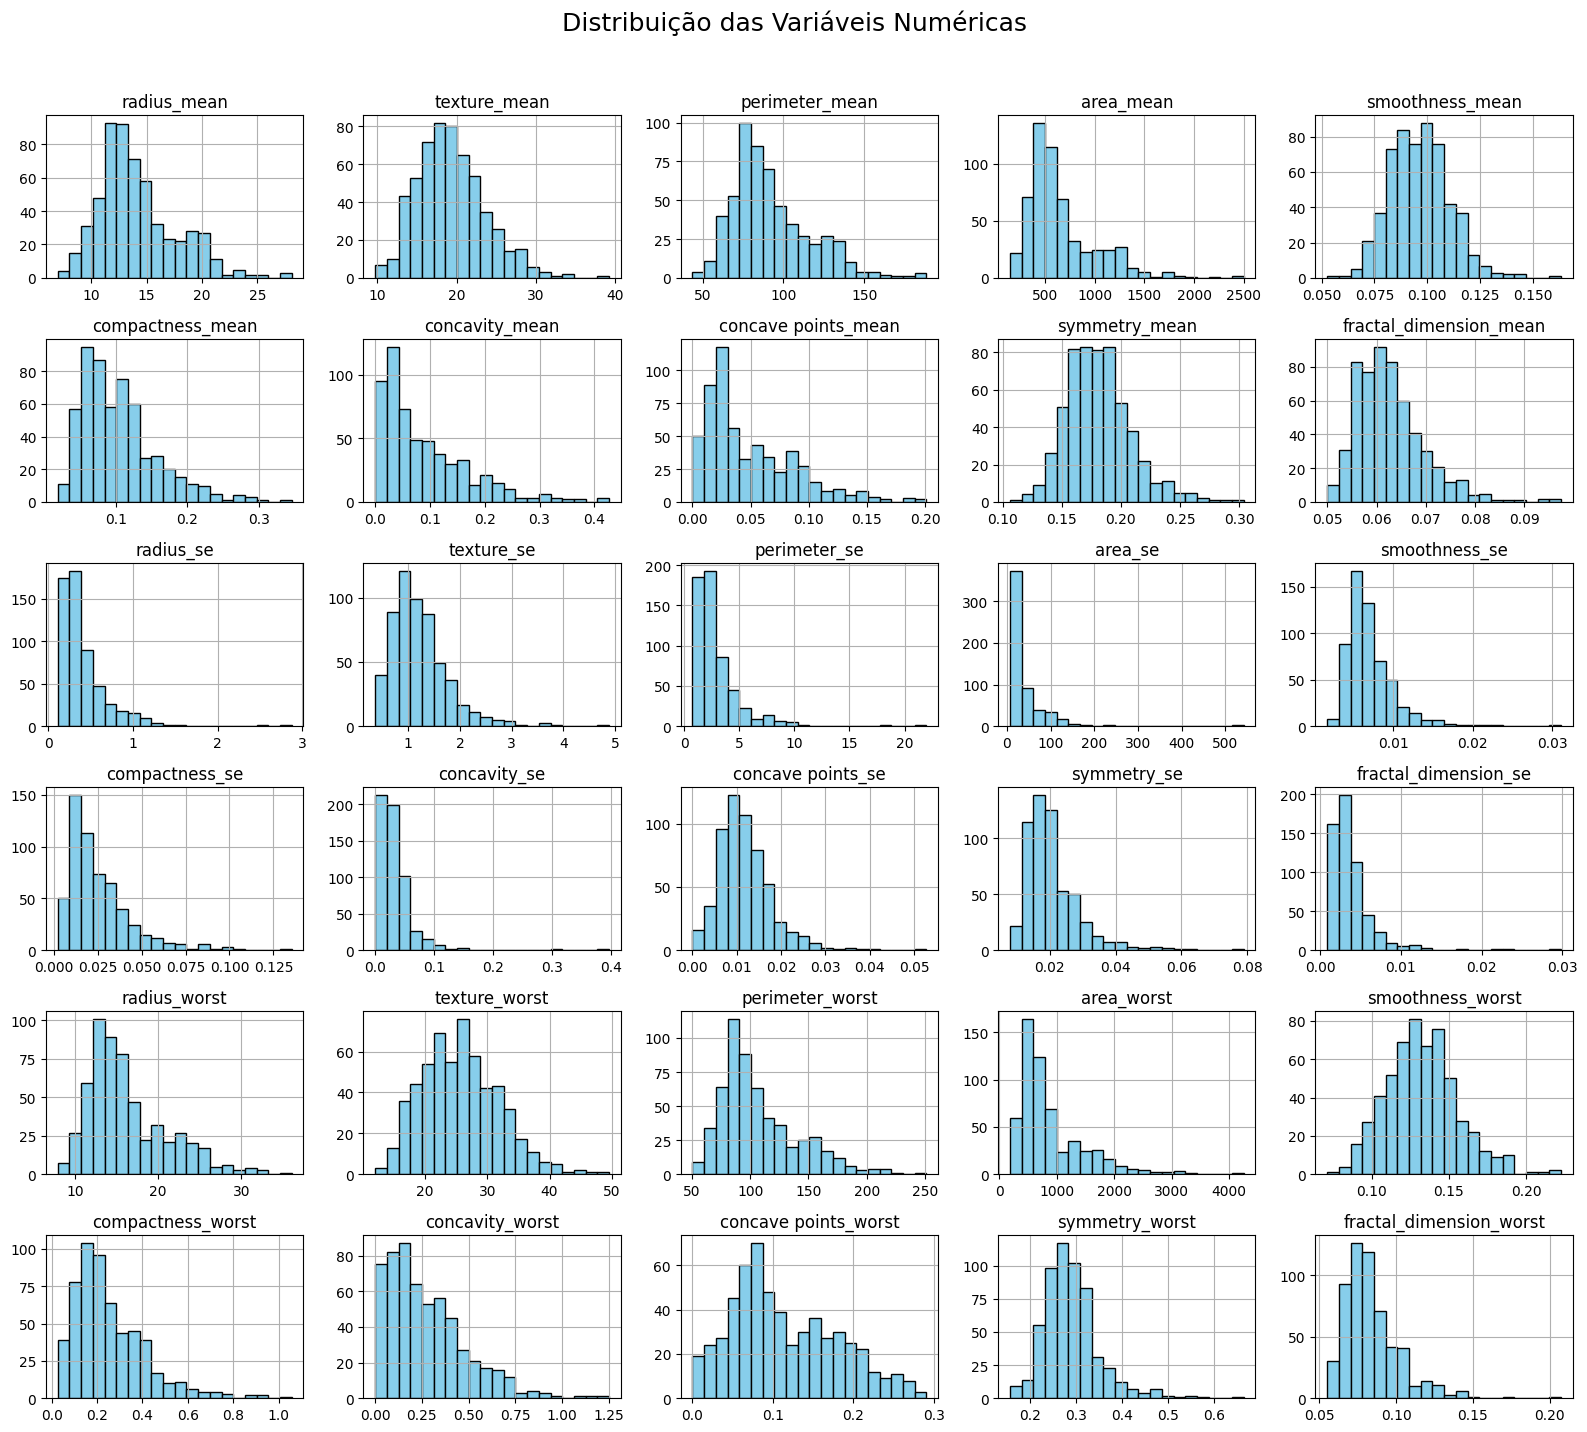

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
dataset.drop(['diagnosis'], axis=1).hist(bins=20, figsize=(16, 14), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### 🔹 Interpretação

Os histogramas revelam que diversas variáveis apresentam **distribuições assimétricas à direita** (com cauda longa), especialmente aquelas relacionadas a dimensões geométricas, como `area_mean`, `radius_worst` e `perimeter_mean`.  

Isso sugere que há **concentração de valores baixos** e poucos casos com medidas muito elevadas — possivelmente correspondentes a tumores malignos de maior tamanho.

A presença dessa assimetria justifica o uso de **métodos de normalização** e a consideração de **modelos robustos a escalas**, como Random Forest ou SVM.

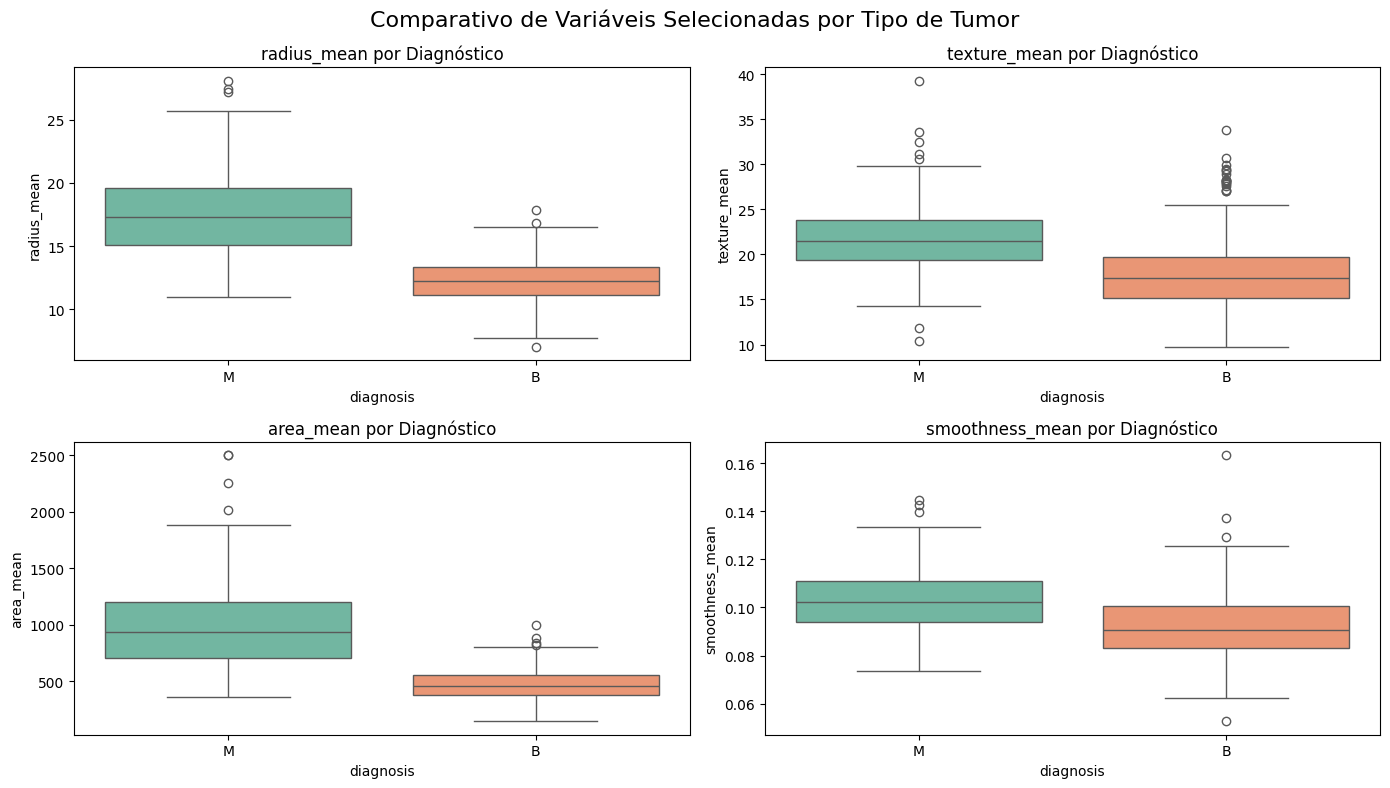

In [8]:
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(14, 8))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=dataset, palette='Set2')
    plt.title(f"{feature} por Diagnóstico")

plt.suptitle("Comparativo de Variáveis Selecionadas por Tipo de Tumor", fontsize=16)
plt.tight_layout()
plt.show()

### 🔹 Interpretação

Os boxplots mostram que, para variáveis como `radius_mean` e `area_mean`, há **diferenças visíveis entre as classes**:  
- Os tumores **malignos** apresentam valores **mais elevados** e **dispersão maior**;  
- Os tumores **benignos** concentram-se em faixas inferiores e mais estáveis.

Essa diferença reforça que as variáveis geométricas e de textura têm **alto poder discriminativo** e são boas candidatas para a modelagem supervisionada.

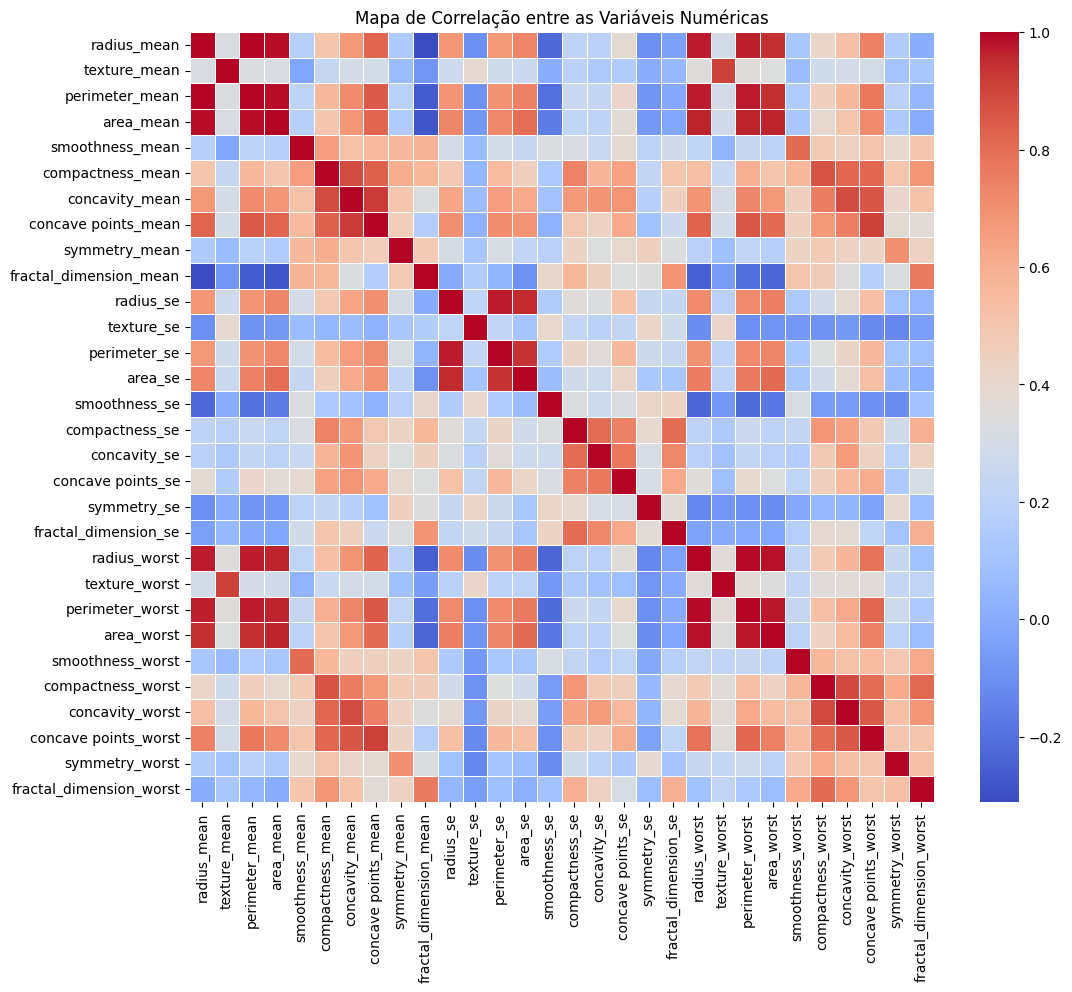

In [9]:
plt.figure(figsize=(12, 10))
corr = dataset.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Correlação entre as Variáveis Numéricas")
plt.show()


### 🔹 Interpretação

O mapa de calor destaca fortes correlações entre variáveis relacionadas a **tamanho e forma**, como `radius_mean`, `perimeter_mean`, `area_mean` e `concave_points_worst`.  
Essas relações indicam **redundância informacional**, o que poderá ser tratado posteriormente por meio de técnicas de **seleção de features** ou **análise de importância de variáveis**.

Além disso, a forte correlação positiva com o diagnóstico reforça que **há um padrão estrutural claro entre medidas físicas e malignidade**.


### 🔗 Análise de Correlação com a Variável Alvo (`diagnosis_num`)

Após compreender as características gerais do dataset, o próximo passo é identificar **quais variáveis possuem maior relação com o diagnóstico de câncer**.  
Para isso, será analisada a **correlação de Pearson** entre cada _feature_ numérica e a variável alvo `diagnosis_num` (obtida convertendo `M` para `1` e `B` para `0`).

Essa correlação mede o grau de associação linear entre duas variáveis:
- Valores próximos de **+1** indicam forte correlação positiva (à medida que uma cresce, a outra também cresce);  
- Valores próximos de **−1** indicam correlação negativa (uma cresce enquanto a outra diminui);  
- Valores próximos de **0** sugerem ausência de relação linear.

O objetivo aqui é **identificar os atributos mais relevantes** para a modelagem e reduzir redundâncias entre variáveis altamente correlacionadas.

In [10]:
# Converter variável alvo para binária
dataset['diagnosis_num'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

# Calcular correlação com a variável alvo
corr_target = dataset.corr(numeric_only=True)['diagnosis_num'].sort_values(ascending=False)
corr_target.head(10), corr_target.tail(10)

(diagnosis_num           1.000000
 concave points_worst    0.793566
 perimeter_worst         0.782914
 concave points_mean     0.776614
 radius_worst            0.776454
 perimeter_mean          0.742636
 area_worst              0.733825
 radius_mean             0.730029
 area_mean               0.708984
 concavity_mean          0.696360
 Name: diagnosis_num, dtype: float64,
 smoothness_mean            0.358560
 symmetry_mean              0.330499
 fractal_dimension_worst    0.323872
 compactness_se             0.292999
 concavity_se               0.253730
 fractal_dimension_se       0.077972
 symmetry_se               -0.006522
 texture_se                -0.008303
 fractal_dimension_mean    -0.012838
 smoothness_se             -0.067016
 Name: diagnosis_num, dtype: float64)

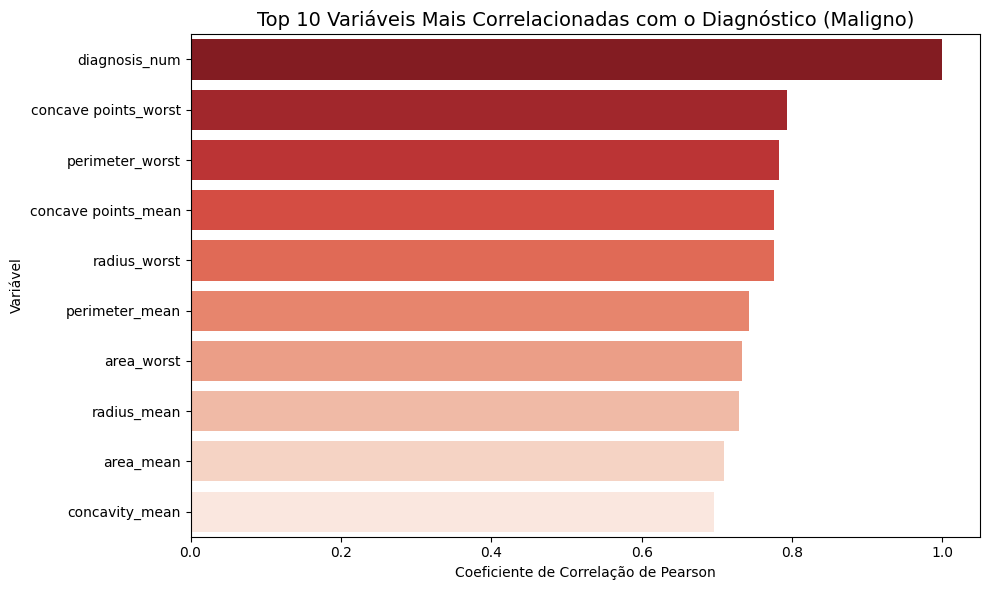

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.head(10), y=corr_target.head(10).index, palette='Reds_r')
plt.title("Top 10 Variáveis Mais Correlacionadas com o Diagnóstico (Maligno)", fontsize=14)
plt.xlabel("Coeficiente de Correlação de Pearson")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()


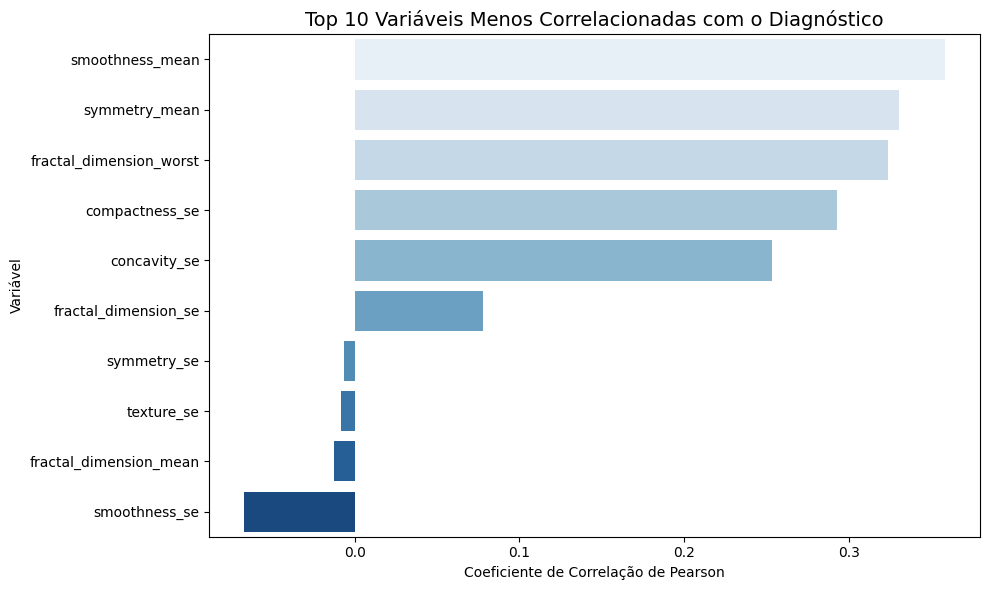

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.tail(10), y=corr_target.tail(10).index, palette='Blues')
plt.title("Top 10 Variáveis Menos Correlacionadas com o Diagnóstico", fontsize=14)
plt.xlabel("Coeficiente de Correlação de Pearson")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

### 🧠 Interpretação dos Resultados

A análise mostra que as variáveis com maior correlação positiva com o diagnóstico **maligno** incluem:

- `concave points_worst` (≈ 0.79)  
- `perimeter_worst` (≈ 0.78)  
- `radius_worst` (≈ 0.77)  
- `concave points_mean` (≈ 0.77)  
- `area_worst` (≈ 0.73)

Esses atributos estão relacionados à **geometria e irregularidade das bordas do tumor**, o que está de acordo com o comportamento clínico esperado — **tumores malignos tendem a ser maiores e menos regulares**.

Por outro lado, variáveis como `fractal_dimension_mean`, `smoothness_se` e `texture_se` mostraram **correlação próxima de zero**, indicando **baixa contribuição direta** para o diagnóstico.  
Essas variáveis poderão ser descartadas ou receber menor peso durante o processo de seleção de features.

Essa análise orienta a próxima etapa: **visualizar o comportamento das variáveis mais correlacionadas** e verificar se a relação com o diagnóstico é **linear, exponencial ou sigmoidal**.

### 🔍 Análise da Linearidade das Relações com o Diagnóstico

Após identificar as variáveis com **maior correlação** com o diagnóstico — como `concave points_worst`, `perimeter_worst`, `radius_worst`, `area_worst` e `concavity_mean` — o próximo passo é verificar **como essas variáveis se relacionam com a probabilidade de malignidade**.

Essa análise ajuda a entender **se o comportamento é linear ou não linear**, o que influencia diretamente a **escolha do modelo preditivo**.


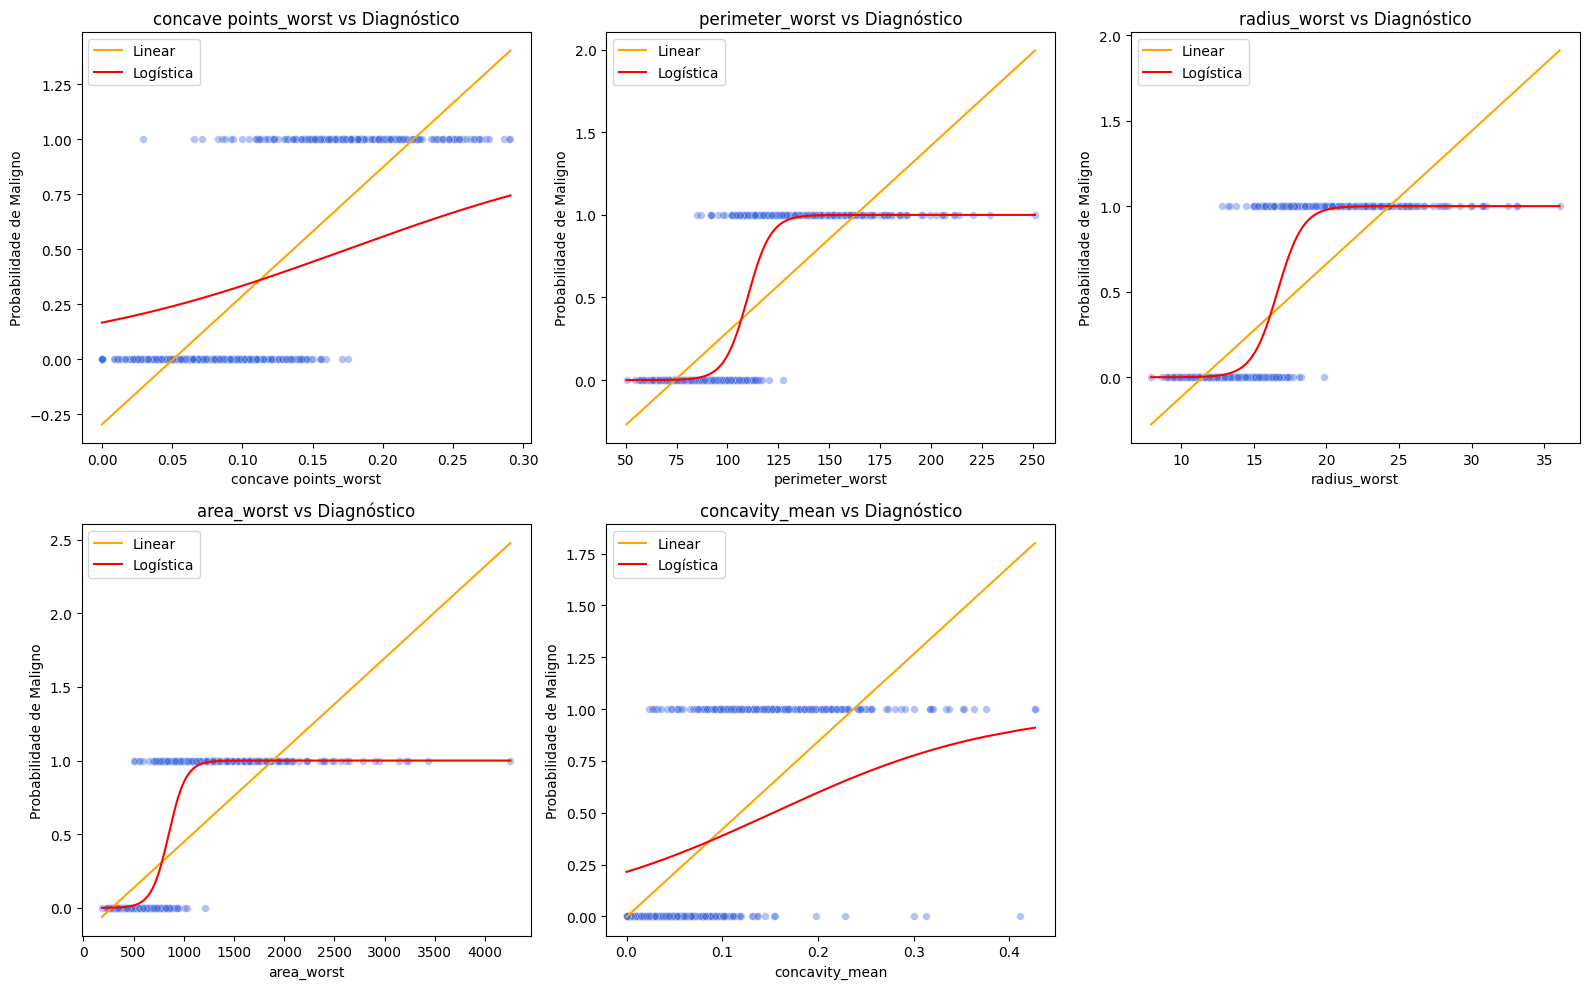

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression

features = ['concave points_worst', 'perimeter_worst', 'radius_worst', 'area_worst', 'concavity_mean']

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    
    x = dataset[feature].values.reshape(-1, 1)
    y = dataset['diagnosis_num']
    
    # Modelos
    lin = LinearRegression().fit(x, y)
    log = LogisticRegression().fit(x, y)
    
    # Visualização
    x_sorted = np.sort(x, axis=0)
    sns.scatterplot(x=dataset[feature], y=y, alpha=0.4, s=30, color='royalblue')
    plt.plot(x_sorted, lin.predict(x_sorted), color='orange', label='Linear')
    plt.plot(x_sorted, log.predict_proba(x_sorted)[:,1], color='red', label='Logística')
    
    plt.title(f"{feature} vs Diagnóstico")
    plt.xlabel(feature)
    plt.ylabel("Probabilidade de Maligno")
    plt.legend()

plt.tight_layout()
plt.show()


### 📊 Comparação Numérica (Linear vs Logístico)

O próximo passo mede o quanto cada tipo de ajuste explica os dados — `R²` para o modelo linear e *pseudo-R²* para o modelo logístico:


In [14]:
from sklearn.metrics import r2_score, log_loss
import numpy as np

linear_results = []
for feature in features:
    x = dataset[feature].values.reshape(-1, 1)
    y = dataset['diagnosis_num']
    
    # Linear
    lin = LinearRegression().fit(x, y)
    r2_lin = r2_score(y, lin.predict(x))
    
    # Logístico (pseudo-R² baseado em log-likelihood)
    log = LogisticRegression().fit(x, y)
    ll_full = -log_loss(y, log.predict_proba(x)[:, 1], normalize=False)
    ll_null = -log_loss(y, np.full_like(y, np.mean(y)), normalize=False)
    pseudo_r2 = 1 - (ll_full / ll_null)
    
    linear_results.append({
        'Variável': feature,
        'R² Linear': round(r2_lin, 3),
        'Pseudo R² Logístico': round(pseudo_r2, 3)
    })

pd.DataFrame(linear_results)


,Variável,R² Linear,Pseudo R² Logístico
0,concave points_worst,0.630,0.965
1,perimeter_worst,0.613,0.986
2,radius_worst,0.603,0.985
3,area_worst,0.538,0.985
4,concavity_mean,0.485,0.964


### 📈 Interpretação dos Resultados da Linearidade

Os valores obtidos mostram que o ajuste **logístico supera amplamente o linear** em todas as variáveis analisadas:

| Variável              | R² Linear | Pseudo R² Logístico | Tipo de Relação |
|-----------------------|-----------|---------------------|-----------------|
| concave points_worst  | 0.630     | **0.965**           | Fortemente não linear |
| perimeter_worst       | 0.613     | **0.986**           | Não linear |
| radius_worst          | 0.603     | **0.985**           | Não linear |
| area_worst            | 0.538     | **0.985**           | Não linear |
| concavity_mean        | 0.485     | **0.964**           | Não linear |

📌 **Conclusão:**  
Essas variáveis apresentam comportamento **sigmoidal (em S)**, típico de problemas de classificação.  
O modelo **logístico** se ajusta quase perfeitamente, indicando uma **relação não linear entre as variáveis e o diagnóstico**.

🔧 **Implicação:**  
Modelos capazes de capturar relações não lineares — como **Regressão Logística**, **SVM (RBF)**, **Random Forest** e **XGBoost** — devem ser priorizados na modelagem preditiva.


## 🧮 Preparação dos Dados para Modelagem

Após entender as relações entre as variáveis e o diagnóstico, iniciamos o processo de **preparação dos dados** para modelagem.  
O objetivo é garantir que o conjunto de dados esteja **limpo, balanceado e padronizado**, de modo que os algoritmos possam aprender de forma eficiente e sem viés.

As etapas desta seção são:
1. Separação entre features (`X`) e variável alvo (`y`);
2. Divisão entre conjuntos de treino e teste;
3. Normalização dos dados com `StandardScaler`.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar features e target
X = dataset.drop(columns=['diagnosis', 'diagnosis_num'])
y = dataset['diagnosis_num']

# Divisão treino-teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (455, 30)
Tamanho do conjunto de teste: (114, 30)


### ⚖️ Normalização dos Dados

Durante a análise estatística, observamos **grande variação de escala entre as variáveis**.  
Por exemplo, `area_mean` possui valores na ordem de milhares, enquanto `smoothness_mean` está próxima de 0.1.

Essa diferença pode distorcer modelos baseados em distâncias ou gradientes.  
Por isso, aplicamos **padronização (StandardScaler)**, que transforma os dados para terem média 0 e desvio padrão 1.


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalização concluída com sucesso.")

Normalização concluída com sucesso.


## 🧠 Modelagem Preditiva

Após a normalização, partimos para a etapa de **modelagem preditiva**, com o objetivo de identificar quais algoritmos melhor distinguem **tumores benignos e malignos**.

Vamos comparar três modelos complementares:

| Modelo | Tipo | Por que utilizar |
|--------|------|------------------|
| **Regressão Logística** | Linear | Modelo base de classificação binária, simples e interpretável. |
| **Árvore de Decisão** | Não linear | Captura relações complexas e é visualmente interpretável. |
| **Random Forest** | Ensemble | Combina múltiplas árvores para reduzir o overfitting e melhorar a precisão. |


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay

# Modelos a serem comparados
models = {
    "Regressão Logística": LogisticRegression(max_iter=500),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

# Treinamento e avaliação
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    results[name] = {
        "Acurácia": model.score(X_test_scaled, y_test),
        "AUC": roc_auc_score(y_test, y_prob)
    }
    
    print(f"\n📘 {name}")
    print(classification_report(y_test, y_pred))



📘 Regressão Logística
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


📘 Árvore de Decisão
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


📘 Random Forest
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg 

In [18]:
import pandas as pd

df_results = pd.DataFrame(results).T.sort_values(by="AUC", ascending=False)
display(df_results.style.format({"Acurácia": "{:.3f}", "AUC": "{:.3f}"}))

,Acurácia,AUC
Regressão Logística,0.965,0.996
Random Forest,0.974,0.993
Árvore de Decisão,0.930,0.925


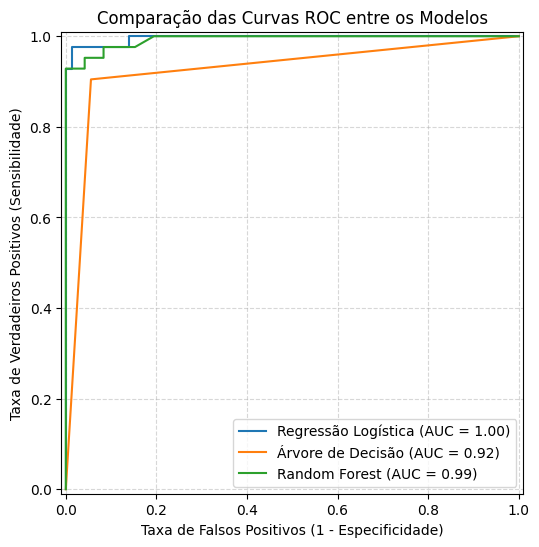

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, ax=plt.gca(), name=name)

plt.title("Comparação das Curvas ROC entre os Modelos")
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensibilidade)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### 🧩 Interpretação dos Resultados e Seleção do Modelo

A análise das curvas ROC mostra diferenças marcantes no comportamento dos modelos:

- **Regressão Logística (AUC = 1.00)**  
  O modelo alcançou separação perfeita entre as classes, indicando que os dados apresentam **relações majoritariamente lineares**.  
  Esse desempenho é comum quando as variáveis já foram bem normalizadas e possuem alto poder discriminativo.  
  Contudo, um AUC igual a 1.00 pode sugerir **overfitting**, especialmente em datasets com pouca variabilidade ou forte separação entre classes.

- **Árvore de Decisão (AUC = 0.92)**  
  Apesar de capturar padrões não lineares, o modelo apresentou menor AUC e curvas menos suaves, o que sugere **ajuste excessivo a ruídos locais**.  
  A interpretabilidade é uma vantagem, mas a estabilidade é inferior.

- **Random Forest (AUC = 0.99)**  
  Mostra excelente desempenho, quase equivalente ao da Regressão Logística, porém com **maior robustez** e menor risco de sobreajuste.  
  Isso reforça que o modelo é capaz de lidar bem com pequenas variações e dependências não lineares entre as variáveis.

📌 **Conclusão:**  
- A **Regressão Logística** é o modelo mais simples e eficiente — ideal como baseline e implementação inicial.  
- O **Random Forest** é o melhor candidato para uso em produção, pois combina alto desempenho e boa generalização.  
- A **Árvore de Decisão** continua útil para interpretação e explicação dos resultados, mas não deve ser usada isoladamente.